In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/realwaste/realwaste-main/README.md
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_670.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_408.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_222.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_200.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_533.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_7.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_285.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_210.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_243.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_590.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_214.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_455.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_622.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/M

In [2]:
import tensorflow as tf  
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout, BatchNormalization, Activation, Rescaling

2025-10-25 15:15:01.637218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761405301.809599      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761405301.861581      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from dataclasses import dataclass
import matplotlib.pyplot as plt 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

In [4]:
data_dir = "/kaggle/input/realwaste/realwaste-main/RealWaste"
img_size = (224, 224)
batch_size = 32

# Create full dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

# Calculate splits
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

# Step 3 — Split
train_ds = dataset.take(train_size)
remaining = dataset.skip(train_size)
val_ds = remaining.take(val_size)
test_ds = remaining.skip(val_size)

Found 4752 files belonging to 9 classes.


I0000 00:00:1761405315.380034      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761405315.380772      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [58]:
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 100
    BATCH_SIZE: int = 32
    LEARNING_RATE: float = 0.001

In [59]:
data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

In [64]:
def cnn_model(input_shape = (224, 224, 3)):

    model = Sequential()

    model.add(InputLayer(shape=input_shape))
    model.add(data_augmentation)

    ## Rescaling
    model.add(Rescaling(1./255))

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
              
    model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
              
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 3: 128 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
              
    model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
              
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    # model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    
    return model
    

In [65]:
model = cnn_model()
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_12 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,141,033 (50.13 MB)

 Trainable params: 13,141,033 (50.13 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [67]:
history = model.fit(train_ds,
                    validation_data = val_ds,
                    batch_size=TrainingConfig.BATCH_SIZE, 
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1, 
                   )

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 26s 197ms/step - accuracy: 0.1707 - loss: 2.1905 - val_accuracy: 0.1960 - val_loss: 2.1415
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.1976 - loss: 2.1535 - val_accuracy: 0.2500 - val_loss: 2.0576
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.2578 - loss: 2.0428 - val_accuracy: 0.2699 - val_loss: 1.9044
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.2928 - loss: 1.8997 - val_accuracy: 0.3665 - val_loss: 1.7500
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.3176 - loss: 1.8058 - val_accuracy: 0.3523 - val_loss: 1.7548
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.3457 - loss: 1.7829 - val_accuracy: 0.3736 - val_loss: 1.6822
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.3899 - loss: 1.6760 - val_accuracy: 0.4702 - val_loss: 1.4458
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.4153 -

In [69]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7136 - loss: 0.7751
Test accuracy: 0.7167


In [70]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

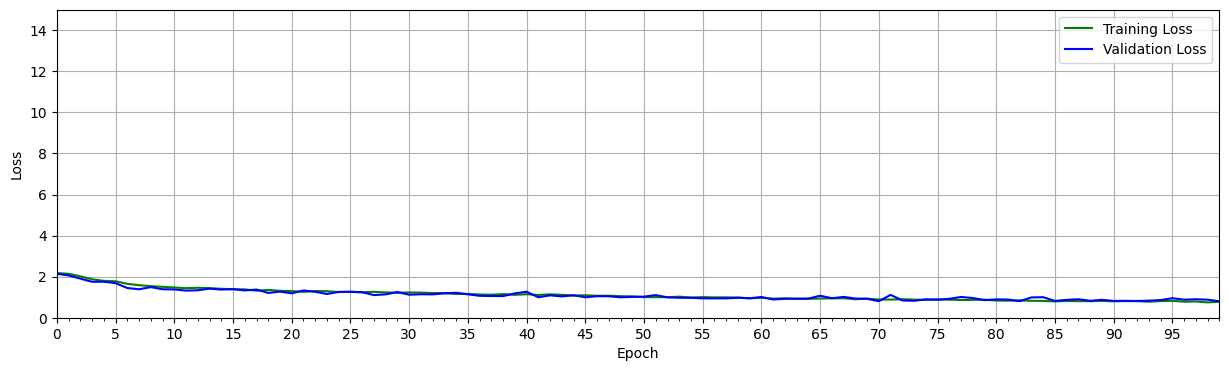

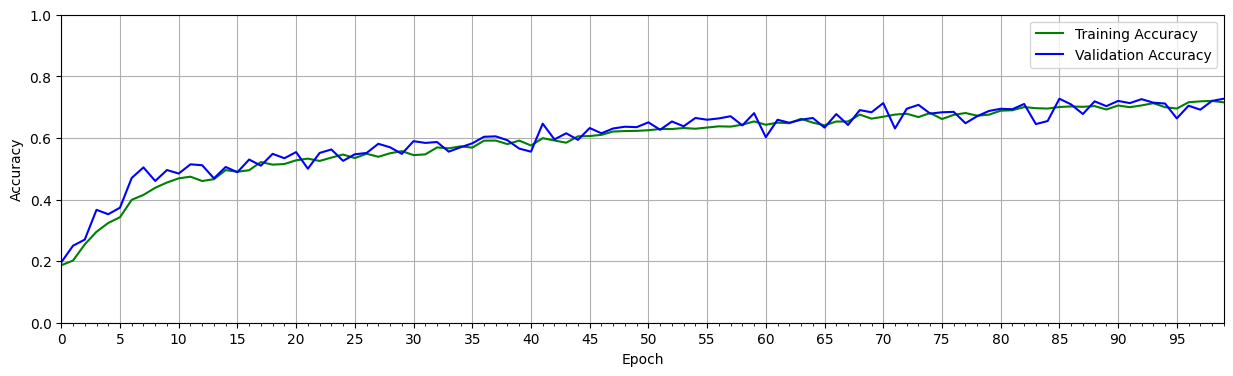

In [71]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 15.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)